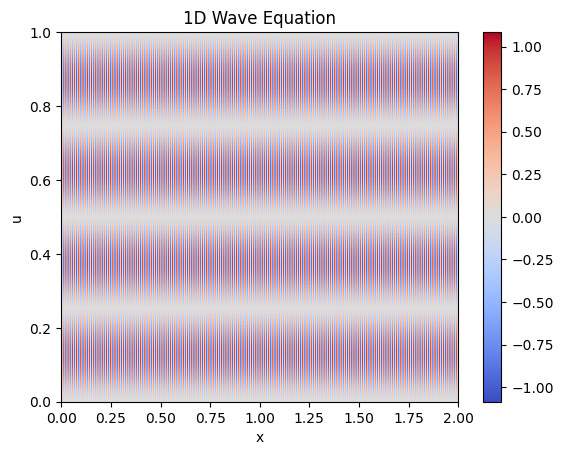

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Nx = 100
Nt = 500
L = 1.0
T = 2.0

dx = L / Nx
dt = T / Nt

c = 1.94 
r = (c * dt / dx) ** 2 
assert r < 1.0  

x = np.linspace(0.0, L, num=Nx+1)
t = np.linspace(0.0, T, num=Nt+1) 

u = np.zeros((Nx+1, Nt+1))
u[:, 0] = np.sin(4 * np.pi * x)

u[0, :] = 0.0
u[Nx, :] = 0.0

for n in range(1, Nt+1):
    for i in range(1, Nx):
        u[i, n] = 2 * (1 - r) * u[i, n-1] - u[i, n-2] + r * (u[i-1, n-1] - 2 * u[i, n-1] + u[i+1, n-1])

plt.title('1D Wave Equation')
plt.xlabel('x')
plt.ylabel('u')
plt.imshow(u, cmap='coolwarm', aspect='auto', extent=[0, T, 0, L])
plt.colorbar()
plt.show()
